<a href="https://colab.research.google.com/github/sayyadaliya90-sketch/Air-Quality-Index/blob/main/Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
df = pd.read_csv("air_pollution_data.csv") df.head()

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [3]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extract date features
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Encode the 'city' column
le = LabelEncoder()
df['city_encoded'] = le.fit_transform(df['city'])

In [4]:
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'month', 'day', 'city_encoded']
X = df[features]
y = df['aqi']


In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.09
MSE: 0.04
RMSE: 0.21
R² Score: 0.98


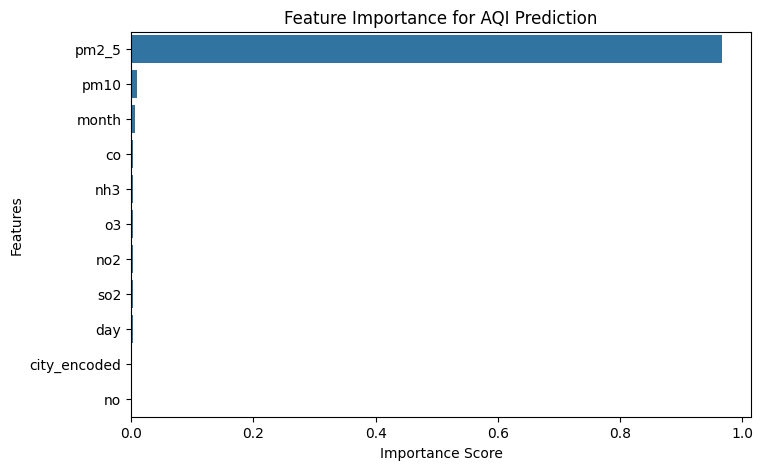

In [8]:
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance for AQI Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


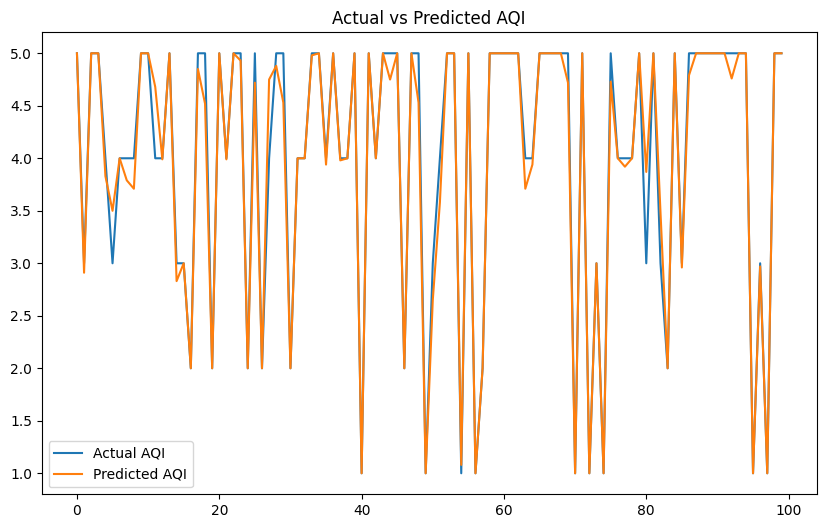

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual AQI")
plt.plot(y_pred[:100], label="Predicted AQI")
plt.legend()
plt.title("Actual vs Predicted AQI")
plt.show()